# DSCI 503 - Homework 06
### Matt Snyder

In [1]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt

In [2]:
# Load the four data sets into DataFrames named iris, ames, titanic, and batting. 
iris = pd.read_csv('iris.txt', sep='\t')
ames = pd.read_csv('ames_housing.txt', sep='\t')
titanic = pd.read_csv('titanic.txt', sep='\t')
batting = pd.read_csv('batting.csv', sep=',')

## Problem 1: Iris Dataset

In [3]:
# Use the head() method to display the first 8 rows of the iris DataFrame.
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor


In [4]:
# Use the describe() method to display information about the statistical distribution of each of the columns in iris.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Use groupby() and mean() to group the iris dataset by species, calculating the mean of each column for each of the
# three species. Store the results in a DataFrame named iris_means. 
iris_means = iris.groupby(['species']).mean()

# Display the new DataFrame.
iris_means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [6]:
# Create a list named iris_colors containing three named colors. 
iris_colors = ['thistle', 'hotpink', 'magenta']

# Also create a list named iris_columns containing the following strings
iris_columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

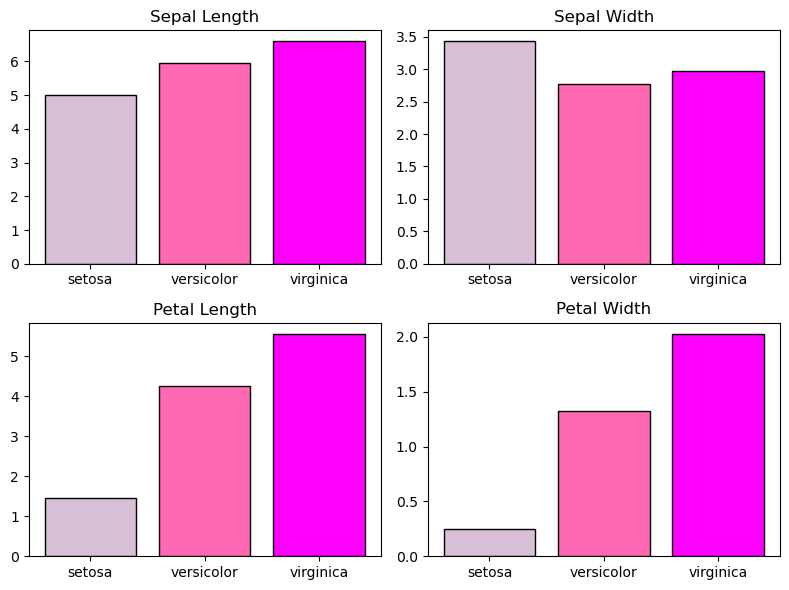

In [29]:
# Set the figure size to [8,6].
plt.figure(figsize=[8,6])

# Use a loop to create a figure containing four bar charts arranged in a 2x2 grid.
# Each bar chart should contain three bars whose heights represent information from one of the four columns from the iris_means DataFrame.
numeric_column_names = iris_means.select_dtypes(include='number').columns.tolist()
species_list = iris_means.index
for i, column_name in enumerate(numeric_column_names):
    plt.subplot(2,2,i+1)
    
    # The bars should be labeled according to the iris species they represent. You can extract this information from iris_means using iris_means.index
    # The bars should have a black border. The color parameter should be set to the iris_colors list.
    plt.bar(x=species_list, height=iris_means.loc[species_list,column_name], color=iris_colors, edgecolor='black')
    
    # Each subplot should have one of the following titles: "Mean Sepal Length", "Mean Sepal Width", "Mean Petal Length", or "Mean Petal Width". You can use the iris_columns list to help form these titles.
    plt.title(iris_columns[i])
    
# Call plt.tight_layout()
plt.tight_layout()
# display the figure using plt.plot().
plt.show()

## Problem 2: Ames Housing - Neighborhoods

In [23]:
# Use the head() method to display the first 8 rows of the ames DataFrame.
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [24]:
# Print ames.columns.values.
print (ames.columns.values)

['Order' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area'
 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config'
 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type'
 'House Style' 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add'
 'Roof Style' 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type'
 'Mas Vnr Area' 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating'
 'Heating QC' 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF'
 'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath'
 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual'
 'TotRms AbvGrd' 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type'
 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Wood Deck SF' 'Open Porch SF'
 'Enclosed Porch' '3Ssn Porch' 'Sc

In [28]:
# Create a DataFrame named ames_nbhd as follows:
# Select the Neighborhood and SalePrice columns from ames.
# Group by Neighborhood, and then calculate the mean of SalePrice for each neighborhood.
# Sort the rows of the DataFrame according to the average sale price, in increasing order.
ames_nbhd = ames.loc[:, ['Neighborhood', 'SalePrice']].groupby(['Neighborhood']).mean() \
        .sort_values(by='SalePrice', ascending=True)

# Use head() to display the first 5 rows of ames_nbhd.
ames_nbhd.head(5)

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


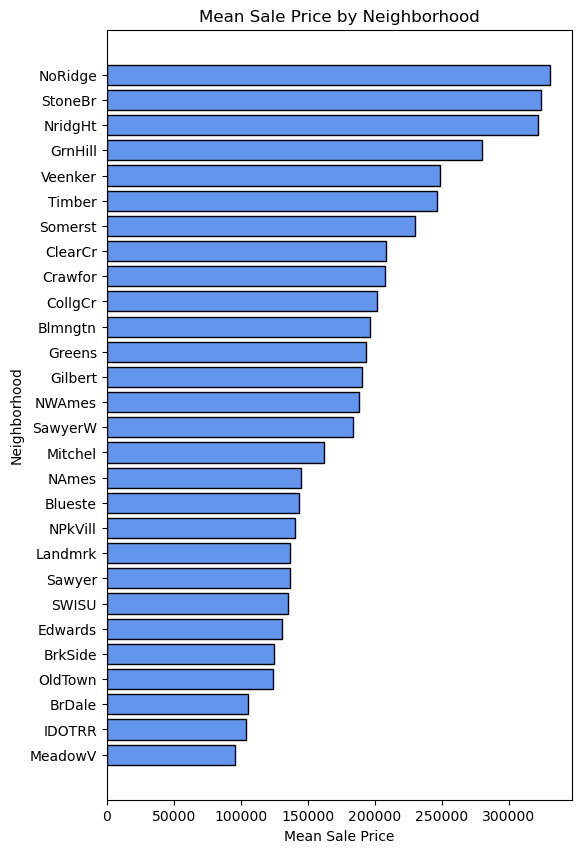

In [33]:
# Set the figure size to be [6,10]
plt.figure(figsize=[6,10])

# Create a horizontal bar chart displaying the mean sale price for houses in each of the neighborhoods. The labels for the
# bars should correspond to the distinct neighborhoods, and can be set using the index of the ames_nbhd DataFrame.
# and choose a single named color to use for the bars. 
plt.barh(y=ames_nbhd.index, width=ames_nbhd.SalePrice, color='cornflowerblue', edgecolor='black')

# The x-axis should be labeled "Mean Sale Price" and the y-axis should be labeled "Neighborhood". 
plt.xlabel('Mean Sale Price')
plt.ylabel('Neighborhood')

# The title of the chart should be "Mean Sale Price by Neighborhood".
plt.title('Mean Sale Price by Neighborhood')
plt.show()

## Problem 3: Ames Housing – House Styles

In [34]:
# Create a DataFrame named ames_style as follows:
# Select the House Style and SalePrice columns from ames.
# Group by House Style, and then calculate the count of SalePrice for each group.
# Sort the rows of the DataFrame according to the count column, in increasing order.
ames_style = ames.loc[:, ['House Style', 'SalePrice']].groupby(['House Style']).count() \
        .sort_values(by='SalePrice', ascending=True)

# By default, the count column in the resulting DataFrame will be named SalePrice. Change the name of this column
ames_style.rename(columns={'SalePrice':'Count'}, inplace=True)

# Display ames_style.
ames_style

,Count
House Style,
2.5Fin,8
1.5Unf,19
2.5Unf,24
SFoyer,83
SLvl,128
1.5Fin,314
2Story,873
1Story,1481


Text(0.5, 1.0, 'Houses Sold by House Style')

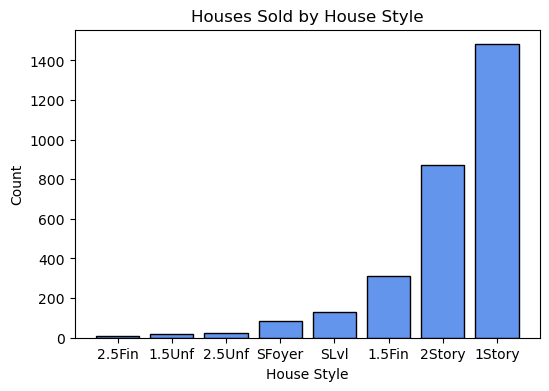

In [36]:
# Set the figure size to be [6,4]
plt.figure(figsize=[6,4])

# Create a standard (vertical) bar chart displaying the number of houses sold for each of the house styles. The labels for
# the bars should correspond to the different house styles, and can be set using the index of the ames_style DataFrame.
# choose a single named color to use for the bars.
plt.bar(x=ames_style.index, height=ames_style.Count, color='cornflowerblue', edgecolor='black')

# The x-axis should be labeled "House Style" and the y-axis should be labeled "Count". 
plt.xlabel('House Style')
plt.ylabel('Count')

# The title of the chart should be "Houses Sold by House Style".
plt.title('Houses Sold by House Style')

## Problem 4: Titanic Dataset – Survival Rates

In [37]:
# Use the head() method to display the first 8 rows of the titanic DataFrame.
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [39]:
# Calculate the average of the Survived column in the titanic DataFrame. 
avg_survived = titanic.Survived.mean()

# Print the results with a message in the format shown below. Round the numerical value to four decimal places.
print (f'Proportion of Passengers who survived: {avg_survived:.4f}')

Proportion of Passengers who survived: 0.3856


In [41]:
# Create a DataFrame named surv_rates by selecting the Pclass, Sex, and Survived columns from titanic,
# grouping the results by both Pclass and Sex, and then calculating the mean of each group. 
surv_rates = titanic.loc[:, ['Pclass', 'Sex', 'Survived']].groupby(['Pclass','Sex']).mean() 

# Display this DataFrame.
surv_rates

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

## Problem 5: Titanic Dataset – Sex Distribution by Class and Outcome

In [44]:
# Add two new columns to titanic. The names of the new columns should be Female and Male. 
# The values in the Female column should be equal to 1 for any record corresponding to a female, and 0 for any record corresponding to a male. 
# The values in the Male column should be equal to 1 for any record corresponding to a male, and 0 for any record corresponding to a female.
titanic.loc[:, 'Male'] = np.where(titanic.Sex == 'male', 1, 0)
titanic.loc[:, 'Female'] = np.where(titanic.Sex == 'female', 1, 0)

# This task can be accomplished in a number of ways, but I would recommend using np.where() along with the Sex
# column.
# Use the head() method to display the first 8 rows of the new titanic DataFrame.
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Male,Female
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,1,0
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,1,0
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,1,0


In [46]:
# Create a DataFrame named sex_dist_by_class by selecting the Pclass, Female, and Male columns from
# titanic, grouping the results by Pclass, and then summing the remaining two columns within each group. 
sex_dist_by_class = titanic.loc[:, ['Pclass', 'Female', 'Male']].groupby(['Pclass']).sum()

# Display this DataFrame.
sex_dist_by_class.head()

,Female,Male
Pclass,,
1,94,122
2,76,108
3,144,343


In [47]:
# Create a DataFrame named sex_dist_by_outcome by selecting the Survived, Female, and Male columns from
# titanic, grouping the results by Survived, and then summing the remaining two columns within each group. 
sex_dist_by_outcome = titanic.loc[:, ['Survived', 'Female', 'Male']].groupby(['Survived']).sum()

# Display this DataFrame.
sex_dist_by_outcome.head()

,Female,Male
Survived,,
0,81,464
1,233,109


## Problem 6: Batting Data – Home Runs

In [48]:
# Use the head() method to display the first 5 rows of the batting DataFrame.
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [49]:
# Print batting.columns.values.
print(batting.columns.values)

['playerID' 'yearID' 'stint' 'teamID' 'lgID' 'G' 'AB' 'R' 'H' '2B' '3B'
 'HR' 'RBI' 'SB' 'CS' 'BB' 'SO' 'IBB' 'HBP' 'SH' 'SF' 'GIDP']


In [51]:
# Create a DataFrame named total_hr by selecting the teamID, yearID, and HR columns from batting, grouping the
# results by both teamID and yearID, and then summing the remaining column within each group. Sort the values by the
# total number of home runs, in descending order.  Set the optional as_index parameter to False
total_hr = batting.loc[:, ['teamID', 'yearID', 'HR']].groupby(['teamID', 'yearID'], as_index=False).sum() \
        .sort_values(by='HR', ascending=False)

# Use head() to display the first 10 rows of this DataFrame.
total_hr.head(10)

,teamID,yearID,HR
1840,NYA,2018,267
2384,SEA,1997,264
2722,TEX,2005,260
2771,TOR,2010,257
125,BAL,1996,257
145,BAL,2016,253
1273,HOU,2000,249
2718,TEX,2001,246
1834,NYA,2012,245
2383,SEA,1996,245


In [53]:
# Create a DataFrame named avg_hr by selecting the teamID and HR columns from the total_hr DataFrame, grouping
# the results by teamID, and then averaging the remaining column within each group. Sort the values by the average
# number of home runs per season, in descending order. 
avg_hr = total_hr.loc[:, ['teamID', 'HR']].groupby(['teamID']).mean().sort_values(by='HR', ascending=False)

# Use head() to display the first 10 rows of this DataFrame.
avg_hr.head(10)

,HR
teamID,
COL,181.769231
MIL,180.761905
ML1,171.538462
ARI,170.142857
TOR,168.452381
ANA,165.500000
TEX,163.851064
TBA,162.714286
OAK,158.196078


## Problem 7: Batting Data – Batting Averages

In [57]:
# Create a DataFrame named batting_avg by selecting the teamID, yearID, H, and AB columns from the batting
# DataFrame, grouping the results by teamID and yearID, and calculating the sum of the remaining two columns within
# each group.
batting_avg = batting.loc[:, ['teamID', 'yearID', 'H', 'AB']].groupby(['teamID', 'yearID']).sum()

# Then add a new column named BA to the batting_avg DataFrame. This new column should be calculated by dividing
# the values in the H column by the values in the AB column. This should be done without using a loop.
batting_avg.loc[:, 'BA'] = batting_avg.H / batting_avg.AB

# Finally, sort the DataFrame by BA, in descending order. Use head() to display the first 10 rows of this DataFrame.
batting_avg.sort_values(by='BA', ascending=False).head(10)

H    AB        BA
teamID yearID                      
PHI    1894    1780  5088  0.349843
BLN    1894    1647  4799  0.343196
BS1    1873     933  2748  0.339520
CHN    1876     926  2748  0.336972
BSN    1894    1658  5011  0.330872
PHI    1895    1664  5037  0.330355
BLN    1896    1548  4719  0.328036
       1897    1584  4872  0.325123
       1895    1530  4725  0.323810
BS1    1875    1128  3515  0.320910

## Problem 8: Batting Data – Cardinals vs. Cubs

In [80]:
# Create a DataFrame named stl_batting that contains the number of hits, at-bats, and home runs for every season of
# the St. Louis Cardinals since 1900.

# Use loc to filter the batting DataFrame, keeping only the records for which teamID is equal to 'SLN'and for
# which the yearID is greater than or equal to 1900.
sel = (batting.teamID == 'SLN') & (batting.yearID >= 1900)

# Use loc to select the yearID, H, AB, and HR columns. You can do this at the same time as when you are
# selecting the rows, or with a second use of loc.
# Group the results by yearID, and then calculate grouped sums for the remaining columns.
stl_batting = batting.loc[sel, ['yearID', 'H', 'AB', 'HR']] .groupby(['yearID']).sum()

# Add a new column named BA to the stl_batting DataFrame. This new column should be calculated by dividing the
# values in the H column by the values in the AB column. This should be done without using a loop.
stl_batting.loc[:, 'BA'] = stl_batting.H / stl_batting.AB

# Create a DataFrame named chi_batting that contains the number of hits, at-bats, home runs, and batting average for
# every season of the Chicago Cubs since 1900. The process is the same as above, except that you will use the teamID of 'CHN'
sel = (batting.teamID == 'CHN') & (batting.yearID >= 1900)
chi_batting = batting.loc[sel, ['yearID', 'H', 'AB', 'HR']].groupby(['yearID']).sum()
chi_batting.loc[:, 'BA'] = chi_batting.H / chi_batting.AB

,H,AB,HR,BA
yearID,,,,
1900,1420,4877,36,0.291163
1901,1430,5039,39,0.283786
1902,1226,4751,10,0.258051
1903,1176,4689,8,0.250800
1904,1292,5104,24,0.253135


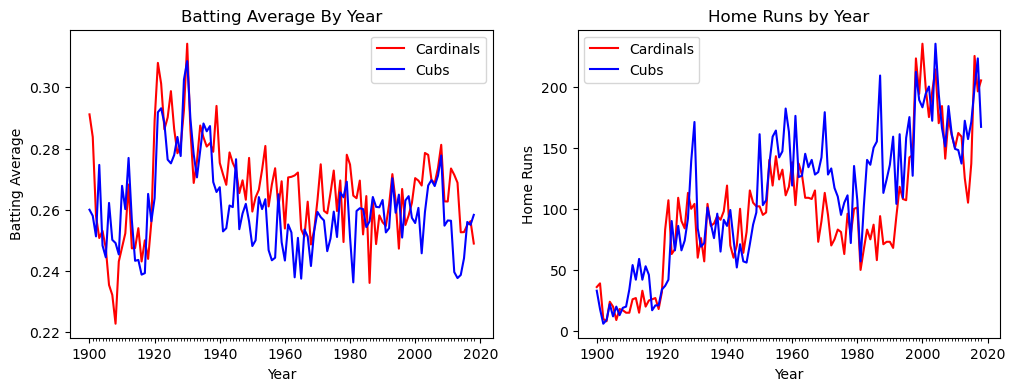

In [92]:
# • Set the figure size to [12,4].
plt.figure(figsize=[12,4])

# Create a figure with two side-by-side line plots. Both plots should display two lines. 
# The plot on the left should display the batting averages for the two teams for each year since 1900, 
plt.subplot(1,2,1)
# Select a single named color to use for the Cardinals in both plots. 
plt.plot(stl_batting.index, stl_batting.BA, label='Cardinals', color='red')
# Select a different named color to use for the Cubs in both plots.
plt.plot(chi_batting.index, chi_batting.BA, label='Cubs', color='blue')
# The x-axis should be labeled "Year", and should show tick marks corresponding to years since 1900.
plt.xlabel('Year')
plt.xticks(stl_batting.index, minor=True)
# The y-axes of the two plots should be labeled "Batting Average" 
plt.ylabel('Batting Average')
# The titles should be "Batting Average By Year" 
plt.title('Batting Average By Year')
# Both plots should include a legend with two items: "Cardinals" and "Cubs".
plt.legend()

plt.subplot(1,2,2)
# and the one on the right should display the total number of home runs for the two teams for each year since 1900. 
plt.plot(stl_batting.index, stl_batting.HR, label='Cardinals', color='red')
plt.plot(chi_batting.index, chi_batting.HR, label='Cubs', color='blue')
plt.xlabel('Year')
plt.xticks(stl_batting.index, minor=True)
# and "Home Runs".
plt.ylabel('Home Runs')
# and "Home Runs by Year".
plt.title('Home Runs by Year')
plt.legend()

# Display the figure using plt.show().
plt.show()